In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:

# ---- Step 1: Load CIFAR-10 Dataset ----

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0-255 → 0-1)

x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 63s 0us/step


In [4]:



# ---- Step 2: Build Stronger CNN Model ----

model = models.Sequential([
# Block 1
layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
layers.MaxPooling2D((2, 2)),
layers.Dropout(0.25),

# Block 2  
layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  
layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  
layers.MaxPooling2D((2, 2)),  
layers.Dropout(0.25),  

# Fully connected layers  
layers.Flatten(),  
layers.Dense(512, activation='relu'),  
layers.Dropout(0.5),  
layers.Dense(10, activation='softmax')

])

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:


# ---- Step 3: Compile Model ----

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# ---- Step 4: Train Model ----

history = model.fit(x_train, y_train, epochs=20, batch_size=64,
validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 99ms/step - accuracy: 0.4322 - loss: 1.5511 - val_accuracy: 0.5727 - val_loss: 1.1889
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.6081 - loss: 1.1050 - val_accuracy: 0.6655 - val_loss: 0.9460
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.6690 - loss: 0.9408 - val_accuracy: 0.6796 - val_loss: 0.9183
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.7039 - loss: 0.8424 - val_accuracy: 0.7184 - val_loss: 0.8205
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.7296 - loss: 0.7662 - val_accuracy: 0.7426 - val_loss: 0.7456
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.7483 - loss: 0.7087 - val_accuracy: 0.7627 - val_loss: 0.6818
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.7665 - loss: 0.6616 - val_accuracy: 0.7638 - val_loss: 0.6861
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.7816 - loss: 0.

In [9]:
model.save("cifar10_cnn_model.h5")
print("model saved")

model saved


In [6]:


# ---- Step 5: Evaluate Model ----

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("✅ Test Accuracy:", test_acc)


313/313 - 5s - 15ms/step - accuracy: 0.7949 - loss: 0.6541
✅ Test Accuracy: 0.7949000000953674


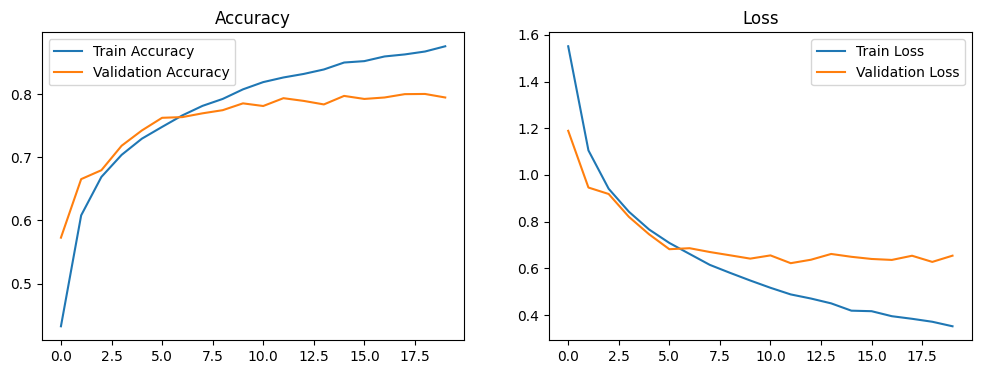

In [7]:

# ---- Step 6: Plot Accuracy & Loss ----

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()